In [1]:
import os
from glob import glob

import cv2
import numpy as np
import matplotlib.pyplot as plt

from typing import Optional

plt.rcParams["figure.figsize"] = (10,10)

In [2]:
def resize_keep_ratio(image, max_size):
    h, w = image.shape[:2]

    if h > w:
        r = h / max_size
        new_w = int(w / r)
        new_h = max_size
    else:
        r = w / max_size
        new_h = int(h / r)
        new_w = max_size
    return cv2.resize(image, (new_w, new_h))

In [3]:
def draw_circle(
        image: np.ndarray,
        detection: Optional[np.ndarray]):
    img_osd = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    if detection is not None:

        # Convert the circle parameters a, b and r to integers.
        detection = np.uint16(np.around(detection))

        for pt in detection[0, :]:
            a, b, r = pt[0], pt[1], pt[2]

            # Draw the circumference of the circle.
            cv2.circle(img_osd, (a, b), r, (0, 255, 0), 8)
    return img_osd

def detect_circle(
        image: np.ndarray) -> Optional[np.ndarray]:
    detection = cv2.HoughCircles(
        image,
        cv2.HOUGH_GRADIENT,
        dp=1,
        minDist=20,
        param1=40,
        param2=60,
        minRadius=30,
        maxRadius=80)
    return detection

## Using `HOUGH_GRADIENT`

Total detected vibrio: 13


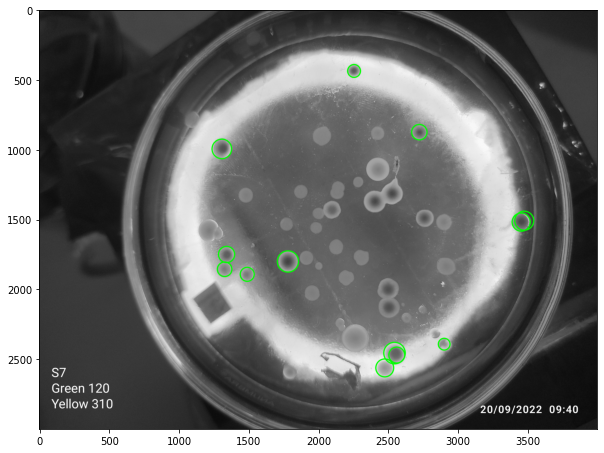

In [4]:
filename = '../dataset/17-45-vibrio.jpg'

img = cv2.imread(filename, cv2.IMREAD_COLOR)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray_blurred = cv2.blur(gray, (3, 3))

# Apply Hough transform on the blurred image.
detected_circles = detect_circle(gray)

# Draw circles that are detected.
img_osd = draw_circle(gray, detected_circles)

if detected_circles is not None:
    print('Total detected vibrio: {}'.format(len(detected_circles[0, :])))
    plt.imshow(img_osd)
else:
    print('Total detected vibrio: 0')

## Run Detection

In [5]:
src_dir = '../dataset'

save_dir = '../output/detection_vibrio_hough_gradient'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

for filename in glob('{}/*.jpg'.format(src_dir)):
    img = cv2.imread(os.path.join(src_dir, filename), cv2.IMREAD_COLOR)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray_blurred = cv2.blur(gray, (3, 3))

    # Apply Hough transform on the blurred image.
    detected_circles = detect_circle(gray)

    # Draw circles that are detected.
    img_osd = draw_circle(img, detected_circles)

    if detected_circles is not None:
        print('Total detected vibrio: {}'.format(len(detected_circles[0, :])))
    else:
        print('Total detected vibrio: 0')

    save_filename = '{}/{}'.format(save_dir, os.path.basename(filename))
    img_osd = resize_keep_ratio(img_osd, 640)
    cv2.imwrite(save_filename, cv2.cvtColor(img_osd, cv2.COLOR_BGR2RGB))

Total detected vibrio: 45
Total detected vibrio: 79
Total detected vibrio: 145
Total detected vibrio: 78
Total detected vibrio: 78
Total detected vibrio: 10
Total detected vibrio: 2
Total detected vibrio: 13
Total detected vibrio: 13
Total detected vibrio: 112
Total detected vibrio: 108
Total detected vibrio: 2
Total detected vibrio: 137
Total detected vibrio: 13
Total detected vibrio: 2
Total detected vibrio: 9
Total detected vibrio: 18
Total detected vibrio: 0
Total detected vibrio: 34
Total detected vibrio: 310


## Using HSV Color Space

In [6]:
filename = '../dataset/17-45-vibrio.jpg'

img = cv2.imread(filename, cv2.IMREAD_COLOR)
hsv_img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

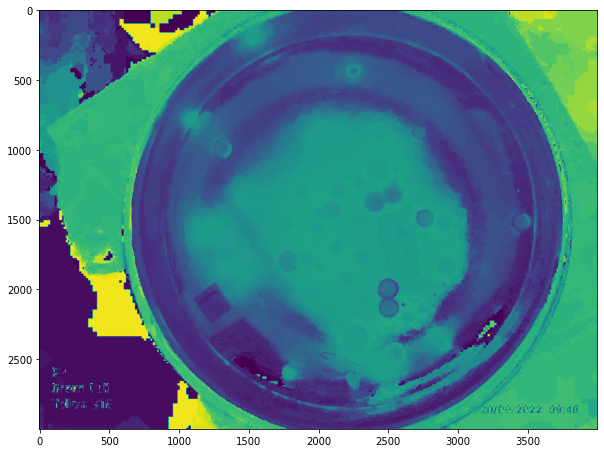

In [7]:
plt.imshow(hsv_img[:,:,0])

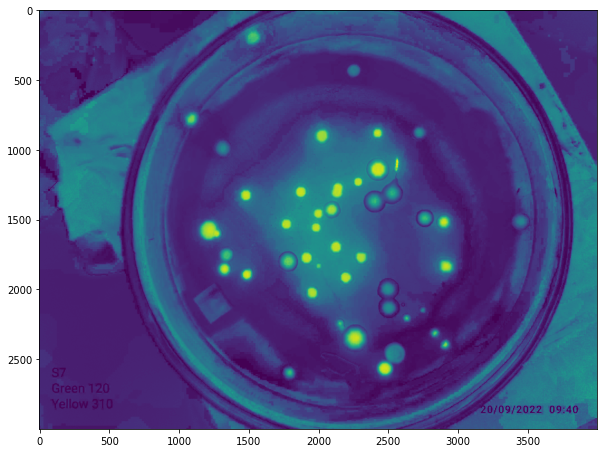

In [8]:
plt.imshow(hsv_img[:,:,1])

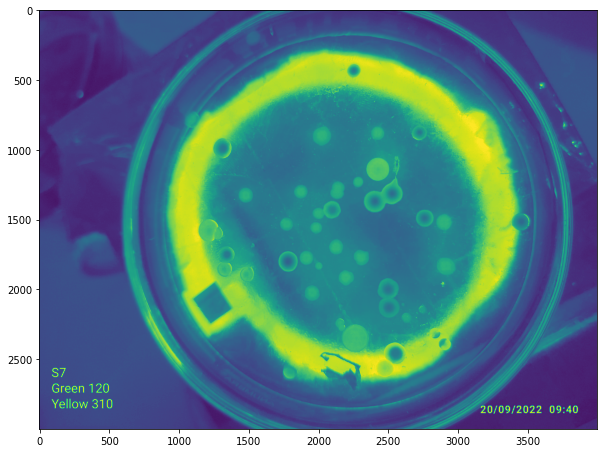

In [9]:
plt.imshow(hsv_img[:,:,2])

In [10]:
detection = detect_circle(cv2.cvtColor(hsv_img, cv2.COLOR_BGR2GRAY))
detection_0 = detect_circle(hsv_img[:,:,0])
detection_1 = detect_circle(hsv_img[:,:,1])
detection_2 = detect_circle(hsv_img[:,:,2])
print("Detected using HSV:", len(detection[0]) if detection is not None else 0)
print("Detected on Hue:", len(detection_0[0]) if detection_0 is not None else 0)
print("Detected on Saturation:", len(detection_1[0]) if detection_1 is not None else 0)
print("Detected on Vue:", len(detection_2[0]) if detection_2 is not None else 0)

Detected using HSV: 5
Detected on Hue: 0
Detected on Saturation: 100
Detected on Vue: 10


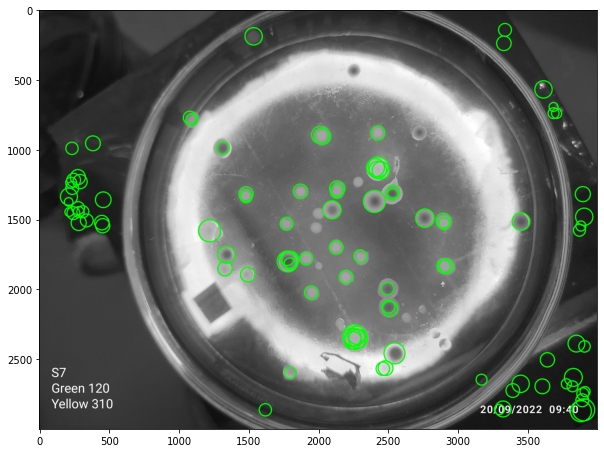

In [11]:
s_img = draw_circle(hsv_img[:,:,2], detection_1)
plt.imshow(s_img)

## Using CMYK

In [12]:
import cv2
import numpy as np

# Load image
filename = '../dataset/17-45-vibrio.jpg'
bgr = cv2.imread(filename)

# Make float and divide by 255 to give BGRdash
bgrdash = bgr.astype(np.float)/255.

# Calculate K as (1 - whatever is biggest out of Rdash, Gdash, Bdash)
K = 1 - np.max(bgrdash, axis=2)

# Calculate C
C = (1-bgrdash[...,2] - K)/(1-K)

# Calculate M
M = (1-bgrdash[...,1] - K)/(1-K)

# Calculate Y
Y = (1-bgrdash[...,0] - K)/(1-K)

# Combine 4 channels into single image and re-scale back up to uint8
CMYK = (np.dstack((C,M,Y,K)) * 255).astype(np.uint8)

C:\Users\QPI-LP~1\AppData\Local\Temp/ipykernel_13560/3412819503.py:9: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  bgrdash = bgr.astype(np.float)/255.
C:\Users\QPI-LP~1\AppData\Local\Temp/ipykernel_13560/3412819503.py:15: RuntimeWarning: invalid value encountered in divide
  C = (1-bgrdash[...,2] - K)/(1-K)
C:\Users\QPI-LP~1\AppData\Local\Temp/ipykernel_13560/3412819503.py:18: RuntimeWarning: invalid value encountered in divide
  M = (1-bgrdash[...,1] - K)/(1-K)
C:\Users\QPI-LP~1\AppData\Local\Temp/ipykernel_13560/3412819503.py:21: RuntimeWarning: invalid value encountered in divide
  Y = (1-bgrdash[...,0] - K)/(1-K)


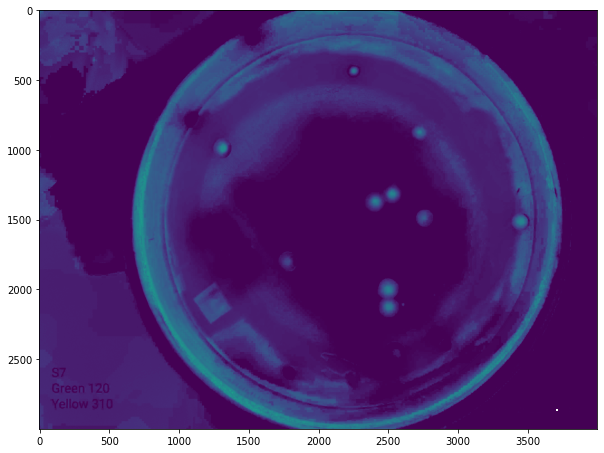

In [13]:
plt.imshow(C)

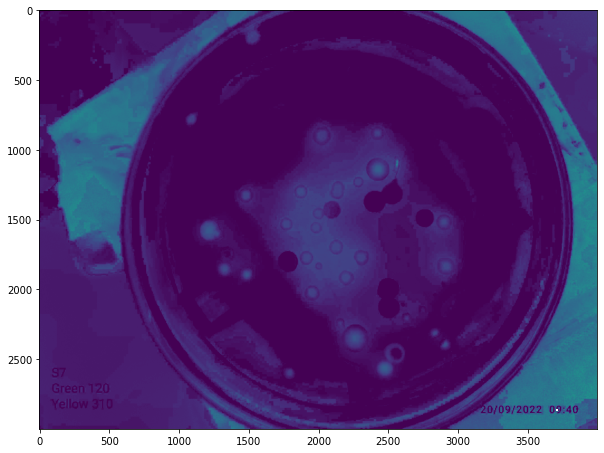

In [14]:
plt.imshow(M)

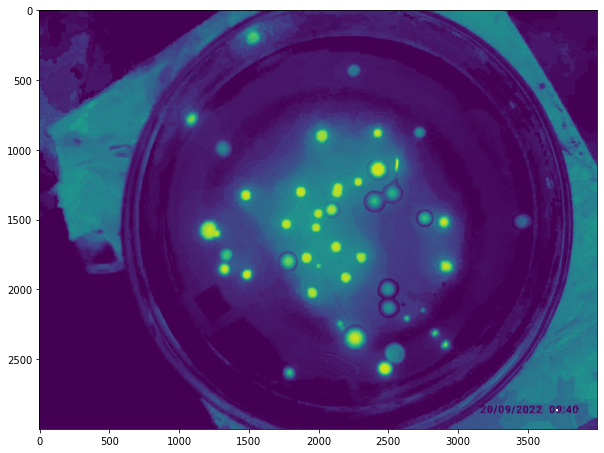

In [15]:
plt.imshow(Y)

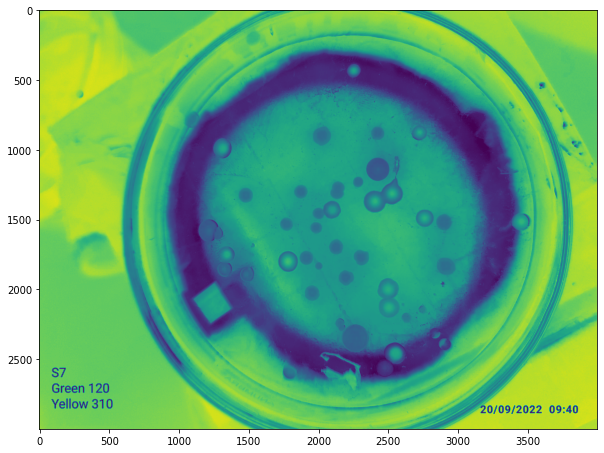

In [16]:
plt.imshow(K)

Total detected vibrio: 4


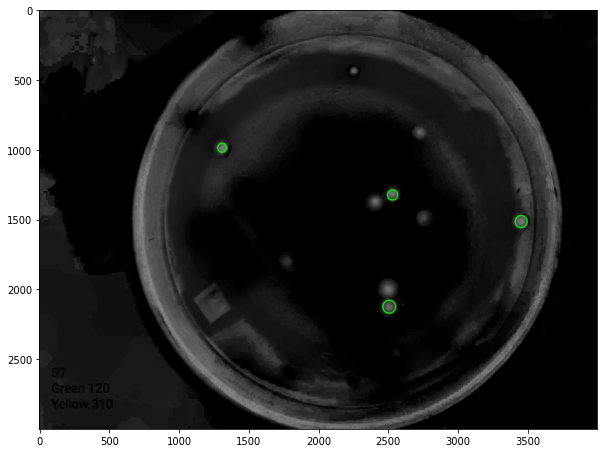

In [17]:
C = C * 255
C = C.astype('uint8')

# Apply Hough transform on the blurred image.
detected_circles = detect_circle(C)

# Draw circles that are detected.
img_osd = draw_circle(C, detected_circles)

if detected_circles is not None:
    print('Total detected vibrio: {}'.format(len(detected_circles[0, :])))
    plt.imshow(img_osd)
else:
    print('Total detected vibrio: 0')